In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
url_data = pd.read_csv("url_dataset.csv")

In [3]:
url_data

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0
...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450174,450174,http://atualizapj.com/,malicious,1


In [4]:
# removing unnamed column
url_data = url_data.drop("Unnamed: 0" , axis = 1)

In [5]:
url_data.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [6]:
# checking number of rows and columns

url_data.shape

(450176, 3)

In [7]:
url_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [8]:
# checking missing values
url_data.isnull().sum()

url       0
label     0
result    0
dtype: int64

In [9]:
import os

### The URL parsing functions focus on splitting a URL string into its components, or on combining URL components into a URL string.

In [10]:
# calculating length features


In [11]:
# length of url

url_data["url_length"] = url_data["url"].apply(lambda i : len(str(i)))

In [12]:
# length of hostname
# importing dependencies
from urllib.parse import urlparse
import os.path

url_data["hostname_length"] = url_data["url"].apply(lambda i : len(urlparse(i).netloc))

In [13]:
# length of path

url_data["path_length"] = url_data["url"].apply(lambda i : len(urlparse(i).path))

In [14]:
# length of first directory

def fd_length(url) :
    urlpath = urlparse(url).path
    try :
        return len(urlpath.split("/")[1])
    except :
        return 0
url_data["fd_length"] = url_data["url"].apply(lambda i : fd_length(i))

In [15]:
# length of top level domain

# !pip install tld

In [16]:
from tld import get_tld

In [17]:
url_data["tld"] = url_data["url"].apply(lambda i : get_tld(i , fail_silently = True))

In [18]:
def tld_length(tld) :
    try :
        return len(tld)
    except :
        return -1
url_data["tld_length"] = url_data["tld"].apply(lambda i : tld_length(i)) 

In [19]:
url_data.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,benign,0,22,14,0,0,com,3
1,https://www.youtube.com,benign,0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3


In [20]:
# calculating count features

# counting (-) symbol

url_data["count-"] = url_data["url"].apply(lambda i : i.count("-"))

In [21]:
# counting (@) symbol

url_data["count@"] = url_data["url"].apply(lambda i : i.count("@"))

In [22]:
# counting (?) symbol

url_data["count?"] = url_data["url"].apply(lambda i : i.count("?"))

In [23]:
# counting (%) symbol

url_data["count%"] = url_data["url"].apply(lambda i : i.count("%"))

In [24]:
# counting (.) symbol

url_data["count."] = url_data["url"].apply(lambda i : i.count("."))

In [25]:
# counting (=) symbol

url_data["count="] = url_data["url"].apply(lambda i : i.count("="))

In [26]:
# counting http

url_data["count-http"] = url_data["url"].apply(lambda i : i.count("http"))

In [27]:
# counting https

url_data["count-https"] = url_data["url"].apply(lambda i : i.count("https"))

In [28]:
# counting www

url_data["count-www"] = url_data["url"].apply(lambda i : i.count("www"))

In [29]:
def digit_count(url) :
    digits = 0
    for i in url :
        if i.isnumeric() :
            digits = digits + 1
    return digits

url_data["count-digits"] = url_data["url"].apply(lambda i : digit_count(i))

In [30]:
def letter_count(url) :
    letters = 0
    for i in url :
        if i.isalpha() :
            letters = letters + 1
    return letters

url_data["count-letters"] = url_data["url"].apply(lambda i : letter_count(i))

In [31]:
# checking for directories

def no_of_dir(url) :
    urldir = urlparse(url).path
    return urldir.count("/")

url_data["count_dir"] = url_data["url"].apply(lambda i : no_of_dir(i))

In [32]:
url_data.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,...,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,benign,0,22,14,0,0,com,3,0,...,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,com,3,0,...,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,com,3,0,...,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,com,3,0,...,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3,0,...,0,0,2,0,1,1,1,0,20,0


In [33]:
 # checking for use of IP in domain
    
import re

In [34]:
def having_ip_address(url) :
    match = re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # for checking IPv4 in domain
                      
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # for checking IPv4 in hexadecimal
    
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # for checking IPv6 in domain
        
    if match:
        return -1
    else:
        return 1
    
url_data['use_of_ip'] = url_data['url'].apply(lambda i: having_ip_address(i))

In [35]:
url_data

,url,label,result,url_length,hostname_length,path_length,fd_length,tld,tld_length,count-,...,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip
0,https://www.google.com,benign,0,22,14,0,0,com,3,0,...,0,2,0,1,1,1,0,17,0,1
1,https://www.youtube.com,benign,0,23,15,0,0,com,3,0,...,0,2,0,1,1,1,0,18,0,1
2,https://www.facebook.com,benign,0,24,16,0,0,com,3,0,...,0,2,0,1,1,1,0,19,0,1
3,https://www.baidu.com,benign,0,21,13,0,0,com,3,0,...,0,2,0,1,1,1,0,16,0,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3,0,...,0,2,0,1,1,1,0,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,11,25,8,com,3,1,...,0,2,0,1,0,0,0,34,3,1
450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,13,139,2,com,3,0,...,0,2,1,1,0,0,21,118,12,1
450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,13,127,2,com,3,0,...,0,1,1,1,0,0,20,109,12,1
450174,http://atualizapj.com/,malicious,1,22,14,1,0,com,3,0,...,0,1,0,1,0,0,0,17,1,1


Text(0, 0.5, 'Number of urls')

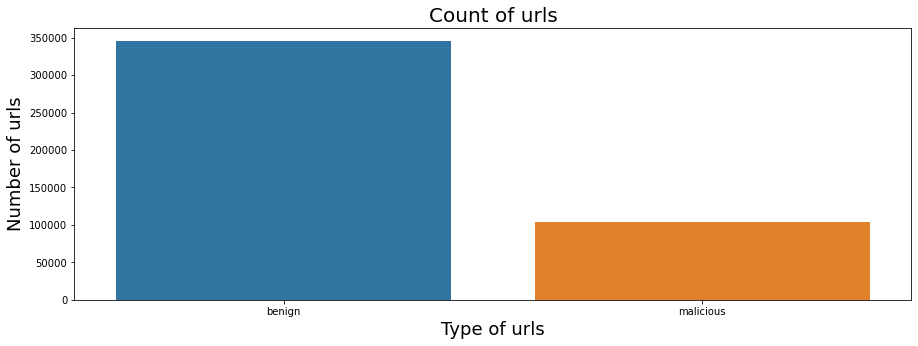

In [36]:
# data visualization

plt.figure(figsize = (15,5))
sns.countplot(x = "label" , data = url_data)
plt.title("Count of urls" , fontsize = 20)
plt.xlabel("Type of urls" , fontsize = 18)
plt.ylabel("Number of urls" , fontsize = 18)

In [37]:
# percentage of malicious and benign URLs

print("Percent of Malicious URLs : {:.2f} %".format(len(url_data[url_data["label"] == "malicious"])
                                                    / len(url_data["label"]) * 100))

print("Percent of Benign URLs : {:.2f} %".format(len(url_data[url_data["label"] == "benign"])
                                                    / len(url_data["label"]) * 100))

Percent of Malicious URLs : 23.20 %
Percent of Benign URLs : 76.80 %


Text(0, 0.5, 'Number of URLs')

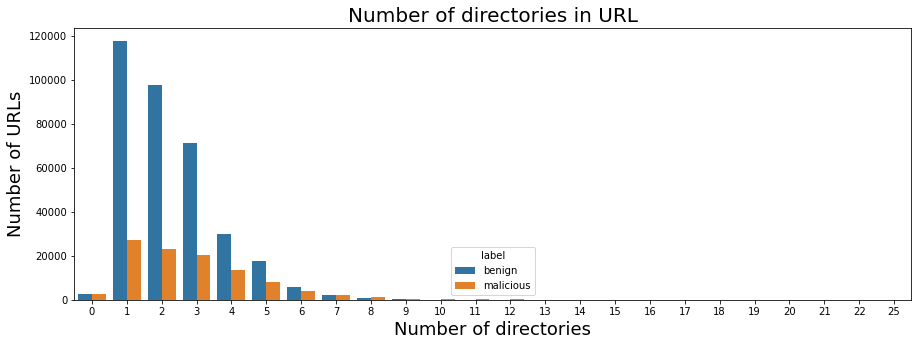

In [38]:
plt.figure(figsize = (15,5))
plt.title("Number of directories in URL" , fontsize = 20)
sns.countplot(x = "count_dir" , data = url_data , hue = "label")
plt.xlabel("Number of directories" , fontsize = 18)
plt.ylabel("Number of URLs" , fontsize = 18)

Text(0, 0.5, 'Number of URLs')

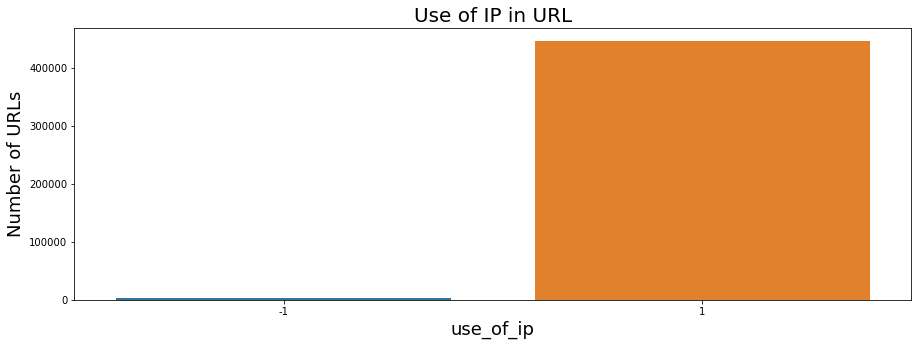

In [39]:
plt.figure(figsize = (15,5))
plt.title("Use of IP in URL" , fontsize = 20)
plt.xlabel("Use of IP" , fontsize = 18)
sns.countplot(url_data["use_of_ip"])
plt.ylabel("Number of URLs" , fontsize = 18)

Text(0, 0.5, 'Number of URLs')

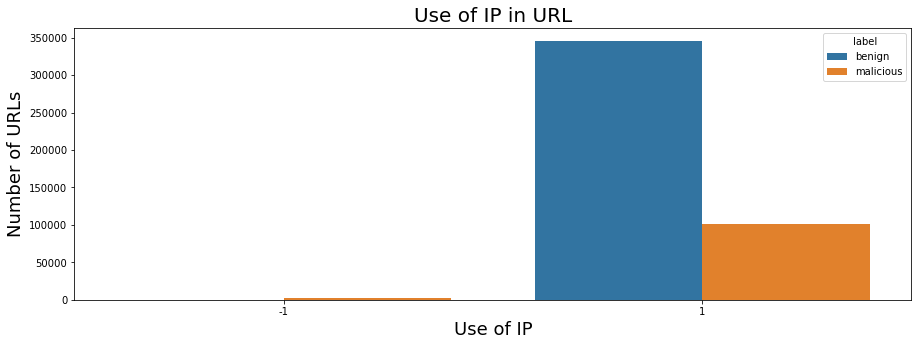

In [40]:
plt.figure(figsize = (15,5))
plt.title("Use of IP in URL" , fontsize = 20)
sns.countplot(url_data["use_of_ip"] , data = url_data , hue = "label")
plt.xlabel("Use of IP" , fontsize = 18)
plt.ylabel("Number of URLs" , fontsize = 18)

## Building models :-

#### I will be using 3 models for my classification :
     1) Decision Tree
     2) Random Forest
     3) Logistic Regession

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [42]:
# Predictor variables

x = url_data[["hostname_length" , "path_length" , "fd_length" , "tld_length" , "count-" , "count@" ,
              "count?" , "count%" , "count." , "count=" , "count-http" , "count-https" ,
              "count-www" , "count-digits" , "count-letters" , "count_dir" , "use_of_ip"]]

# Target variable

y = url_data["result"]

In [43]:
x.shape

(450176, 17)

In [44]:
y.shape

(450176,)

## Splitting the data into training and testing :

In [45]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size = 0.3 , random_state = 42)

## 1) Decision Tree

In [46]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train , y_train)

dt_predictions = dt_model.predict(x_test)

accuracy_score(y_test , dt_predictions)

0.9953986367271297

In [47]:
print(confusion_matrix(y_test , dt_predictions))

[[241202    750]
 [   700  72472]]


## 2) Random Forest

In [48]:
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)

rfc_predictions = rfc.predict(x_test)

accuracy_score(y_test , rfc_predictions)

0.9972455287442403

In [49]:
print(confusion_matrix(y_test , rfc_predictions))

[[241662    290]
 [   578  72594]]


## 3) Logistic Regression

In [50]:
log_model = LogisticRegression()
log_model.fit(x_train , y_train)

log_predictions = log_model.predict(x_test)

accuracy_score(y_test , log_predictions)

0.9957730924969218

In [51]:
print(confusion_matrix(y_test , log_predictions))

[[241388    564]
 [   768  72404]]


In [52]:
def fun():
    lis1=[]
    a1=url.get()
    lis1.append(a1)
    lis1.append(len(urlparse(a1).netloc))
    lis1.append(len(a1))
    lis1.append(fd_length(a1))
    tld = get_tld(a1, fail_silently = True)
    lis1.append(tld_length(a1))
    lis1.append(a1.count("-"))
    lis1.append(a1.count("@"))
    lis1.append(a1.count("?"))
    lis1.append(a1.count("%"))
    lis1.append(a1.count("."))
    lis1.append(a1.count("="))
    lis1.append(a1.count("http"))
    lis1.append(a1.count("https"))
    lis1.append(a1.count("www"))
    lis1.append(digit_count(a1))
    lis1.append(letter_count(a1))
    lis1.append(no_of_dir(a1))
    lis1.append(having_ip_address(a1))
 
    ind=["hostname_length" , "path_length" , "fd_length" , "tld_length" , "count-" , "count@" ,
              "count?" , "count%" , "count." , "count=" , "count-http" , "count-https" ,
              "count-www" , "count-digits" , "count-letters" , "count_dir" , "use_of_ip"]
    test_x1=pd.DataFrame(lis1[1:],index=ind)
 
    prediction = []
    prediction.append(dt_model.predict(test_x1.T))
    prediction.append(rfc.predict(test_x1.T))
    prediction.append(log_model.predict(test_x1.T))

    n = len(prediction)
    for i in range(n):
        if i == 0:
            if prediction[i]== 0 :
                cv.create_text(800,550,text='BENIGN using Decision Tree',font= ('arial', 18, 'bold'),fill='blue',anchor='nw',tags=('label'))
            else:
                cv.create_text(800,550,text='MALICIOUS using Decision Tree',font= ('arial', 18, 'bold'),fill='green',anchor='nw',tags=('label'))
        elif i == 1:
            if prediction[i]== 0:
                cv.create_text(800,570,text='BENIGN using Random Forest',font= ('arial', 18, 'bold'),fill='blue',anchor='nw',tags=('label'))
            else:
                cv.create_text(800,570,text='MALICIOUS using Random Forest',font= ('arial', 18, 'bold'),fill='green',anchor='nw',tags=('label'))
        else:
            if prediction[i]== 0:
                cv.create_text(800,590,text='BENIGN using Logistic Regression',font= ('arial', 18, 'bold'),fill='blue',anchor='nw',tags=('label'))
            else:
                cv.create_text(800,590,text='MALICIOUS using Logistic Regression',font= ('arial', 18, 'bold'),fill='green',anchor='nw',tags=('label'))

def reset():
    url.set(" ")
    cv.delete('label')


In [53]:
from tkinter import*
import tkinter as tk
root = tk.Tk()
root.title('FRAUD LINKS PREDICTION')
root.geometry("1260x660")
root.resizable(0, 0)
menu1=Menu(root)
root.config(menu=menu1)
fileMenu=Menu(menu1) 
menu1.add_cascade(label="FILE",menu=fileMenu)
fileMenu.add_command(label="Reset",command=reset) 
fileMenu.add_command(label="Exit",command=root.destroy)
cv = tk.Canvas(width=600, height=600)
cv.pack(side='top', fill='both', expand='yes')
#cv.create_image(0,0, image=bg_image, anchor='nw')
cv.create_text(450,120, text="url",font=("Helvetica", 18,'bold'),fill="black", anchor='nw')

url = StringVar()

entry0=tk.Entry(cv,textvariable = url, font = ('arial', 14, 'bold'), bd = 8, insertwidth = 4,
justify = 'left').place(x=500,y=120,anchor='nw' )

btn=tk.Button(cv,text="SHOW RESULT",font=('arial',18,'bold'),command=fun)
btn.place(x=700,y=300,anchor='se')
btn=tk.Button(cv,text="RESET",font=('arial',18,'bold'),command=reset)
btn.place(x=650,y=400,anchor='se')
root.mainloop()